# Exploratory Work

Author: Mitchell Hooymans 

This notebook is intended to be exploratory work into the data, SEDs, and the overall thesis topic "Investigating the Impact of AGN on Rest-frame UV and VJ colour space". This notebook will be one of many used to explore multiple topics within this project but will not focus on the final results of the project. 

In [10]:
# Import required libraries
# Begin by Importing all of the required libraries.
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits

In [11]:
# We would like to read in both the galaxy dataset and the agn dataset
# Begin my importing the the SED templates
galsedatlas_file = os.path.join('datasets', 'Templates', 'hlsp_galsedatlas_multi_multi_all_multi_v1_cat.fits')
#agnsedatlas_file = os.path.join('datasets', 'Templates', 'hlsp_agnsedatlas_multi_photometry_all_multi_v1_cat.fits')
# Read in the SED templates
galsedatlas_fits = fits.open(galsedatlas_file)

# Check what the particular fits file contains - To eplore this we can use the info() method.
galsedatlas_fits.info()

Filename: datasets\Templates\hlsp_galsedatlas_multi_multi_all_multi_v1_cat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1  photometry    1 BinTableHDU    121   129R x 55C   [15A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  2  photometry_minus_a    1 BinTableHDU    121   129R x 55C   [15A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  summary       1 BinTableHDU     35   129R x 12C   [15A, D, D, 11A, 4A, 6A, D, D, D, D, K, D]   
  4  extinction    1 BinTableHDU     67   129R x 28C   [15A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  5  NGC_4450_spec    1 BinTableHDU     32   2364R x 4C   [D, D, D, K]   
  6  UGC_04881_spec    1 Bi

In [12]:
# Begin by attempting to plot at least one of the SED templates
# We can use the astSED library to plot the SED templates

# Importing the best fitting filters
# Similarly we can also read in the passbands for the UVJ colours - check this at some other time
pb_U = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

pb_U = astSED.Passband(pb_U, normalise=True)
pb_V = astSED.Passband(pb_V, normalise=True)
pb_J = astSED.Passband(pb_J, normalise=True)


# For visualy inspecting the SED templates with the passbands
U_arr = np.array(pb_U.asList())
V_arr = np.array(pb_V.asList())
J_arr = np.array(pb_J.asList())

38


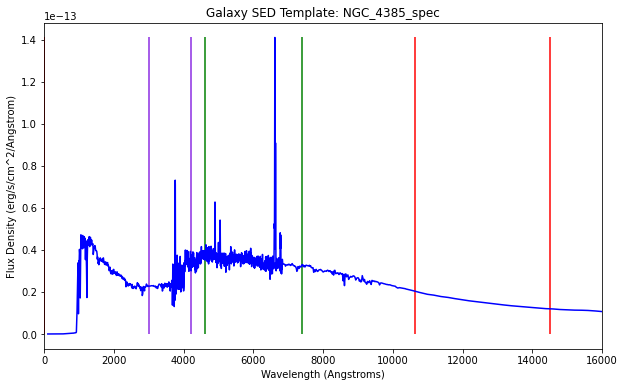

In [13]:
n = np.random.randint(5, 134)
print(n)
sed_one_wavelegnth = galsedatlas_fits[n].data['observed_wavelength']
sed_one_flux = galsedatlas_fits[n].data['flux_density']

plt.figure(figsize=(10, 6))

# Plot the SED template
plt.plot(sed_one_wavelegnth, sed_one_flux, 'b')

# Plot the lines for each of the passbands
plt.vlines(U_arr[0], 0, sed_one_flux.max(), color='#8A2BE2',linestyle="-", label='U Min')
plt.vlines(U_arr[-1], 0, sed_one_flux.max(), color='#8A2BE2',linestyle="-", label='U max')

# Do the same for the two other pass bands
plt.vlines(V_arr[0], 0, sed_one_flux.max(), color='g',linestyle="-", label='V Min')
plt.vlines(V_arr[-1], 0, sed_one_flux.max(), color='g',linestyle="-", label='V max')

plt.vlines(J_arr[0], 0, sed_one_flux.max(), color='#FF0000',linestyle="-", label='J Min')
plt.vlines(J_arr[-1], 0, sed_one_flux.max(), color='#FF0000',linestyle="-", label='J max')




plt.title('Galaxy SED Template: ' + galsedatlas_fits[n].name)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux Density (erg/s/cm^2/Angstrom)')
plt.xlim(0, 16000)
plt.show()



# We want to plot the UVJ filters over the top of the SED template
# We can use the astSED library to plot the SED templates

In [14]:
# Now we want to investigate what an AGN SED looks like
# Import the template from Brown
#agn_file = 'hlsp_agnsedatlas_multi_multi_ngc3227-central_multi_v1_spec-obs.txt'
#agn_template = os.path.join('datasets', 'Templates', 'Brown',  agn_file)


# Read in all of the AGN templates, they are individual files, so read in everything in a folder
# Check the contents of the folder
agn_folder = os.path.join('datasets', 'Templates', 'Brown')
agn_files = os.listdir(agn_folder)

print(agn_files)

# Loop over every file in the folder and read in the SED templates
agn_sed = []
for file in agn_files:
    # Read in the same way as above
    agn_template = os.path.join('datasets', 'Templates', 'Brown',  file)
    agn_sed.append(agn_template)
    
print(agn_sed)

['hlsp_agnsedatlas_multi_multi_2masxj13000533+1632151_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_3c120_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_3c273_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_3c351_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_3c390-3_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_ark120_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_ark564_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_f2m1113+1244_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_fairall9_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_h1821+643_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_iras-11119+3257_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_iras-f16156+0146_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_mrk110_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_mrk1502_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_mrk231_multi_v1_spec-obs.txt', 'hlsp_agnsedatlas_multi_multi_mrk279_mu

In [15]:
# read into an array and then dataframe
# Read columns 1 and 3
n = np.random.randint(0, 41)
print(n)
observed_wavelength, flux_density = np.loadtxt(agn_sed[n], usecols=(0, 2), unpack=True)

# Print or use the data as needed
print("Observed Wavelength:", observed_wavelength)
print("Flux Density:", flux_density)


13
Observed Wavelength: [9.0000e-02 9.1000e-02 9.2000e-02 ... 2.8737e+05 2.9456e+05 3.0192e+05]
Flux Density: [1.671656e-14 1.768895e-14 1.870635e-14 ... 4.081076e-26 3.970079e-26
 3.862102e-26]


In [16]:
observed_wavelength

# convert um to A
observed_wavelength = observed_wavelength * 1e4

# convert flux density
flux_density = flux_density

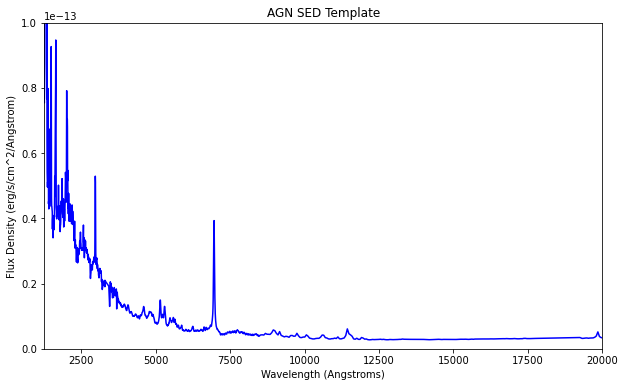

In [17]:
# Try plotting both of these together
plt.figure(figsize=(10, 6))
plt.plot(observed_wavelength, flux_density, 'b')
plt.title('AGN SED Template')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux Density (erg/s/cm^2/Angstrom)')
plt.xlim(1250, 20000)
plt.ylim(0, 1e-13)
plt.show()

Combined Wavelengths: [1.0280e+02 1.0471e+02 1.0666e+02 ... 2.8737e+09 2.9456e+09 3.0192e+09]
Combined Flux Values: [nan nan nan ... nan nan nan]


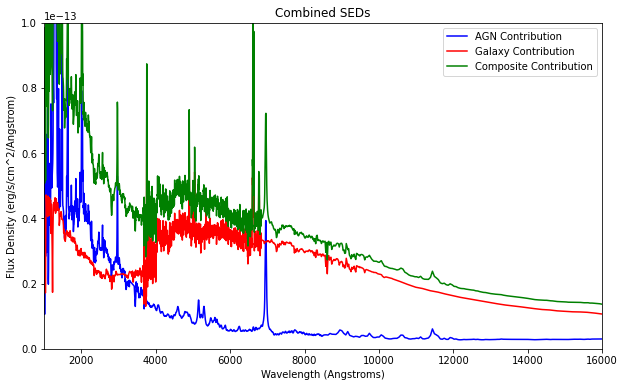

In [18]:
# AGN Contribution -> 100%
wavelengths_sed1 = observed_wavelength  
flux_sed1 = flux_density

# decreate the contribution to 10%
flux_sed1 = flux_sed1 

# Galaxy Contribution -> 100%
wavelengths_sed2 = sed_one_wavelegnth
flux_sed2 = sed_one_flux




# Combine SEDs with interpolation
combined_wavelengths = np.union1d(wavelengths_sed1, wavelengths_sed2)

# Interpolate flux values for the combined wavelengths
combined_flux_sed1 = np.interp(combined_wavelengths, wavelengths_sed1, flux_sed1, left=np.nan, right=np.nan)
combined_flux_sed2 = np.interp(combined_wavelengths, wavelengths_sed2, flux_sed2, left=np.nan, right=np.nan)

# Take the mean flux at each wavelength
#combined_flux = np.nanmean(np.vstack([combined_flux_sed1, combined_flux_sed2]), axis=0)
# Sum the flux values at each wavelength
combined_flux = combined_flux_sed1 + combined_flux_sed2

# Print or use the combined data as needed
print("Combined Wavelengths:", combined_wavelengths)
print("Combined Flux Values:", combined_flux)


# plot the combined SEDs
plt.figure(figsize=(10, 6))
plt.plot(wavelengths_sed1, flux_sed1, 'b', label='AGN Contribution')
plt.plot(wavelengths_sed2, flux_sed2, 'r', label='Galaxy Contribution')
plt.plot(combined_wavelengths, combined_flux, 'g', label='Composite Contribution')
plt.title('Combined SEDs')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux Density (erg/s/cm^2/Angstrom)')

plt.xlim([1000, 16000])
plt.ylim(0, 1e-13)
plt.legend()
plt.show()


In [ ]:
# Sole AGN template, no stellar component (100% AGN) - theoretical, pure agn. 


# Write paper summaries
# Data dumping 
# Write as you go ->


# Email papers to michael before next session
# Read papers and write summaries, then send them through to Michael
# Read the papers and write summaries

# for data

# Try and hunt down pure AGN template in a cosistent wavelength range.

# output some examples, and show michael.
# different galaxy types
# pure AGN
 
# limitation by adding by composition 
# -> need to make sure flux units are both the same
# -> frequency dependence in flux density
# -> need to remove frequency dependence
# -> convert to Janskys (erg/s/cm^2/Hz) -> (Jy) -> use the table michael provided




